<a href="https://colab.research.google.com/github/GadeMounika8/ML_model_building_on_datasets/blob/main/Model_Building_on_Health_care_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all required Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing all required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.shape

(1338, 7)

# Data Cleaning

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
# removing outliers in bmi column by using IQR Method
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
bmi_lower_bound = Q1 - 1.5*IQR
bmi_upper_bound = Q3 + 1.5*IQR
df = df[(df['bmi'] > bmi_lower_bound)&(df['bmi']<bmi_upper_bound)]
print(df.shape)

(1328, 7)


# Data Exploration

In [ ]:
df.shape

(1328, 7)

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
len(df.columns)

7

In [ ]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337],
           dtype='int64', length=1328)

In [ ]:
df.count()

age         1328
sex         1328
bmi         1328
children    1328
smoker      1328
region      1328
charges     1328
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1328 non-null   int64  
 1   sex       1328 non-null   object 
 2   bmi       1328 non-null   float64
 3   children  1328 non-null   int64  
 4   smoker    1328 non-null   object 
 5   region    1328 non-null   object 
 6   charges   1328 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.0+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1328.000000,1328.000000,1328.000000,1328.000000
mean,39.219127,30.537308,1.097139,13221.047810
std,14.042170,5.922176,1.208008,11997.547468
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4744.325050
50%,39.000000,30.300000,1.000000,9369.615750
75%,51.000000,34.488750,2.000000,16604.302645
max,64.000000,46.750000,5.000000,62592.873090


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1328.0,39.219127,14.042170,18.0000,27.00000,39.00000,51.000000,64.00000
bmi,1328.0,30.537308,5.922176,15.9600,26.22000,30.30000,34.488750,46.75000
children,1328.0,1.097139,1.208008,0.0000,0.00000,1.00000,2.000000,5.00000
charges,1328.0,13221.047810,11997.547468,1121.8739,4744.32505,9369.61575,16604.302645,62592.87309


In [ ]:
df['sex'].value_counts()

male      669
female    659
Name: sex, dtype: int64

In [ ]:
df['sex'].value_counts().count()

2

In [ ]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['sex'].nunique()

2

In [ ]:
df['children'].value_counts()

0    570
1    320
2    238
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
df['children'].value_counts().count()

6

In [ ]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [ ]:
df['children'].nunique()

6

In [ ]:
df['smoker'].value_counts()

no     1057
yes     271
Name: smoker, dtype: int64

In [ ]:
df['smoker'].value_counts().count()

2

In [ ]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['smoker'].nunique()

2

In [ ]:
df['region'].value_counts()

southeast    357
southwest    324
northwest    324
northeast    323
Name: region, dtype: int64

In [ ]:
df['region'].value_counts().count()

4

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df['region'].nunique()

4

In [ ]:
df['age'].min()

18

In [ ]:
df['age'].max()

64

In [ ]:
df['charges'].min()

1121.8739

In [ ]:
df['charges'].max()

62592.87309

In [ ]:
df['bmi'].min()

15.96

In [ ]:
df['bmi'].max()

46.75

In [ ]:
df.select_dtypes(include = 'number')

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [ ]:
df.select_dtypes(exclude = 'number')

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [ ]:
pd.crosstab(df['sex'], df['smoker'])

smoker,no,yes
sex,,
female,546,113
male,511,158


In [ ]:
pd.crosstab(df['sex'], df['region'])

region,northeast,northwest,southeast,southwest
sex,,,,
female,160,164,174,161
male,163,160,183,163


In [ ]:
pd.crosstab(df['smoker'], df['region'])

region,northeast,northwest,southeast,southwest
smoker,,,,
no,256,266,268,267
yes,67,58,89,57


# Data Visualization

# Using Matplotlib and Seaborn Libraries:

# Uni-Variate Data Analysis:

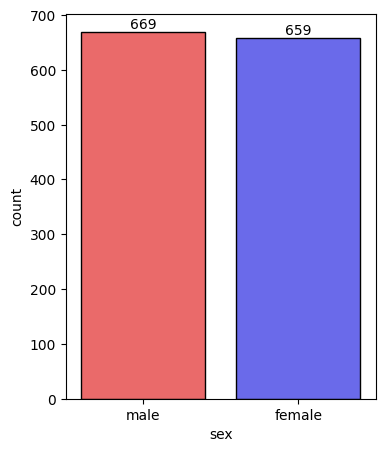

In [ ]:
plt.figure(figsize = (4,5))
a = sns.countplot(x = 'sex', data = df, palette = 'seismic_r', edgecolor = 'k', order = ['male', 'female'])
for i in a.containers:
    a.bar_label(i)
plt.show();

# Observation:

- Males are more in number as compared to Females.

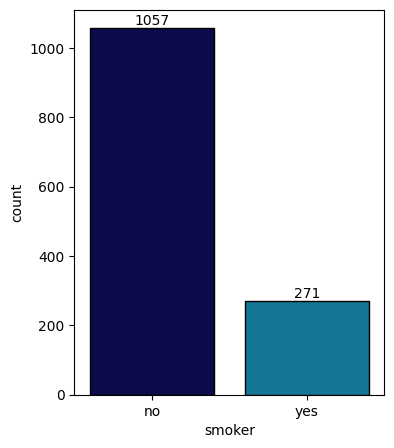

In [ ]:
plt.figure(figsize = (4,5))
a = sns.countplot(x = 'smoker', data = df, palette = 'ocean', edgecolor = 'k', order = ['no', 'yes'])
for i in a.containers:
    a.bar_label(i)
plt.show();

# Observation:

- Non-Smokers are more in number as compared to Smokers.

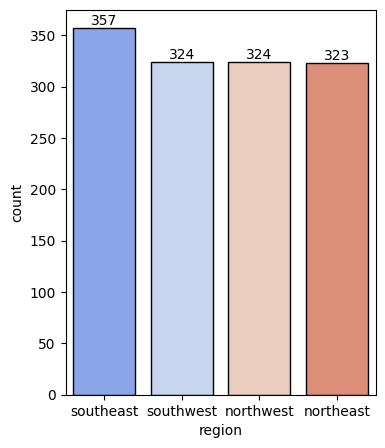

In [ ]:
plt.figure(figsize = (4,5))
a = sns.countplot(x = 'region', data = df, palette = 'coolwarm', edgecolor = 'k', order = ['southeast', 'southwest', 'northwest', 'northeast'])
for i in a.containers:
    a.bar_label(i)
plt.show();

# Observations:

- southeast region People are more in number as compared to all other regions.
- northwest and northeast region People are same in number.

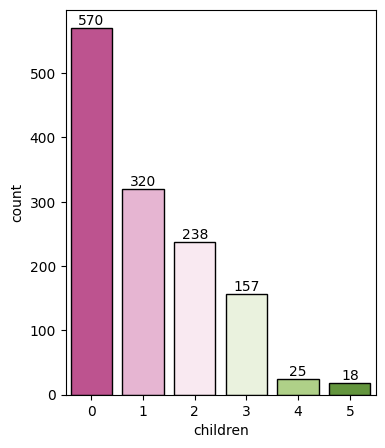

In [ ]:
plt.figure(figsize = (4,5))
a = sns.countplot(x = 'children', data = df, palette = 'PiYG', edgecolor = 'k')
for i in a.containers:
    a.bar_label(i)
plt.show();

# Observations:

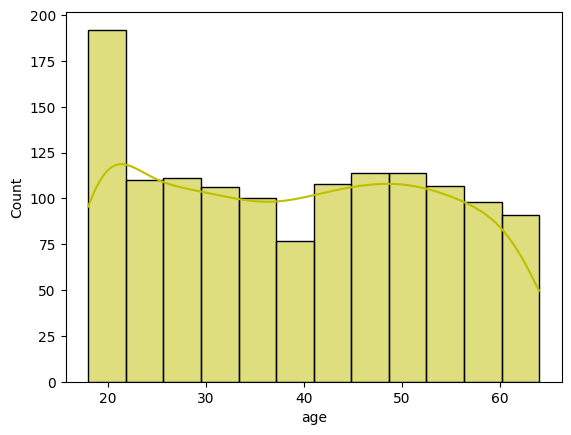

In [ ]:
sns.histplot(x = 'age', data = df, color = 'y', edgecolor = 'k', kde = True)
plt.show();

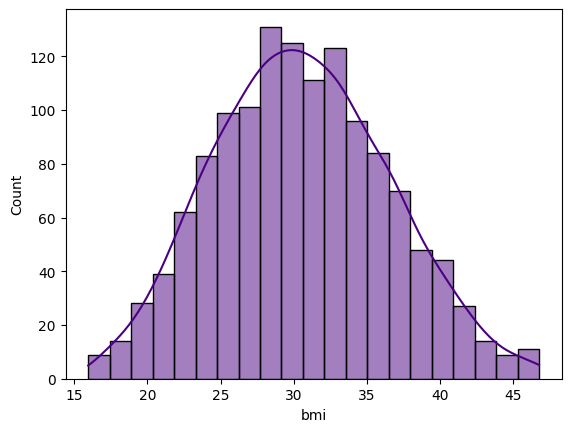

In [ ]:
sns.histplot(x = 'bmi', data = df, color = 'indigo', edgecolor = 'k', kde = True)
plt.show();

# Observation:

- Approximately, bmi column follows Normal Distribution.

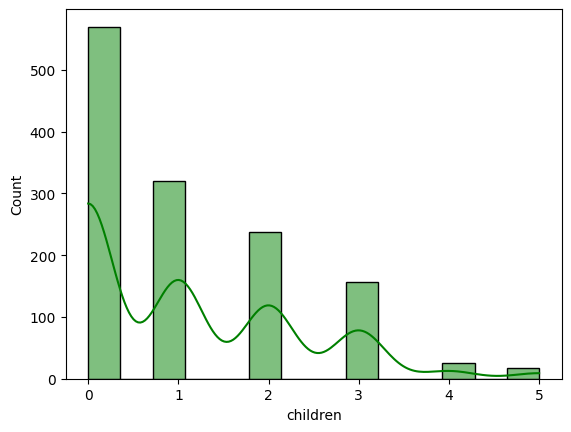

In [ ]:
sns.histplot(x = 'children', data = df, color = 'green', edgecolor = 'k', kde = True)
plt.show();

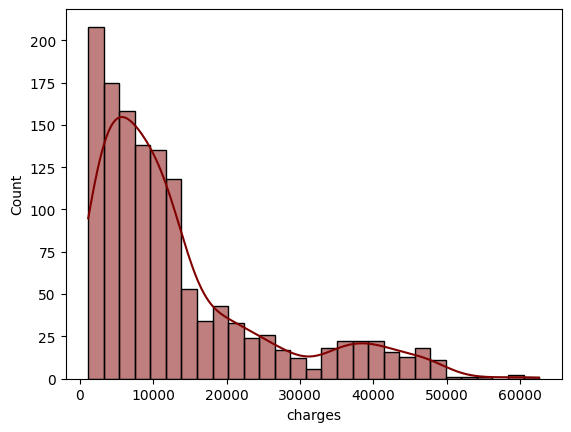

In [ ]:
sns.histplot(x = 'charges', data = df, color = 'maroon', edgecolor = 'k', kde = True)
plt.show();

# Observation:

- Charges column data distribution is Right Skewed (i.e, Positive Skewness).

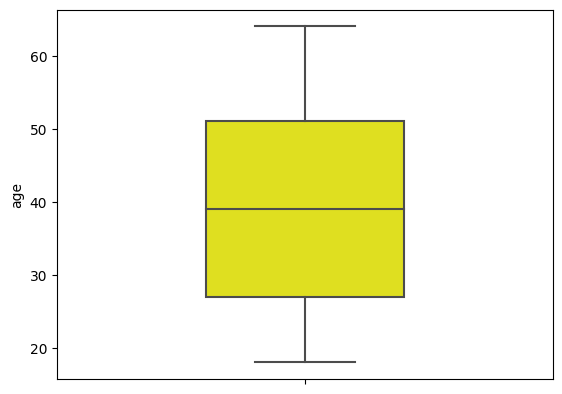

In [ ]:
sns.boxplot(y = 'age', data = df, width = 0.4, color = 'yellow')
plt.show();

# Observation:

- 25% to 75% of the age of the people is in between 27 and 51 years.
- Minimum age of People is 18 years.
- Maximum age of People is 64 years.
- Here, we can see that there is no Outliers in age column.

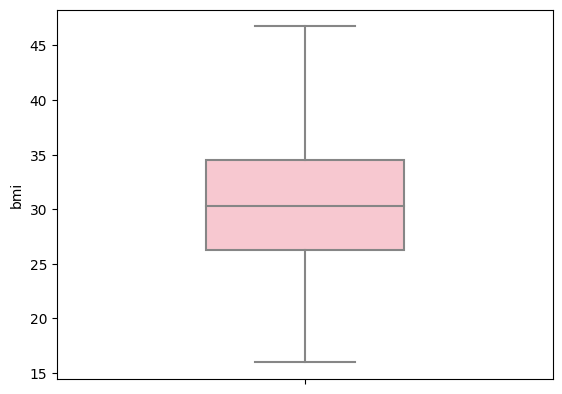

In [ ]:
sns.boxplot(y = 'bmi', data = df, width = 0.4, color = 'pink')
plt.show();

# Observations:

- Minimum bmi of People is 15.
- Maximum bmi of People is nearly 53.
- 25% to 50% of bmi of People is in between 26 and 34.
- bmi column has Outliers.

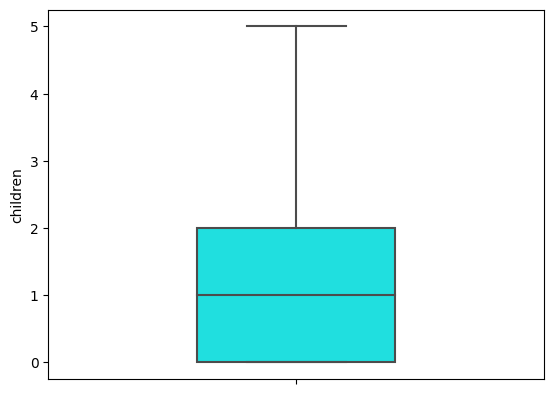

In [ ]:
sns.boxplot(y = 'children', data = df, width = 0.4, color = 'cyan')
plt.show();

# Observations:

- 50% of the People having 1 Child.
- 25% of the People having 2 children.

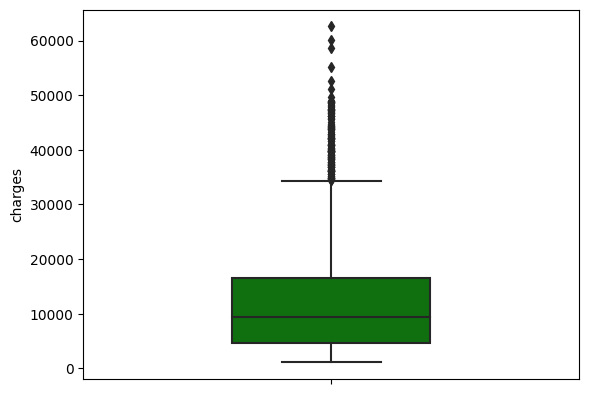

In [ ]:
sns.boxplot(y = 'charges', data = df, width = 0.4, color = 'green')
plt.show();

# Observations:

- 25% to 70% of the Charges approximately is in between 4500 and 16500.
- Many Outliers are Exist in Charges Column.

# Bi-Variate Data Analysis:

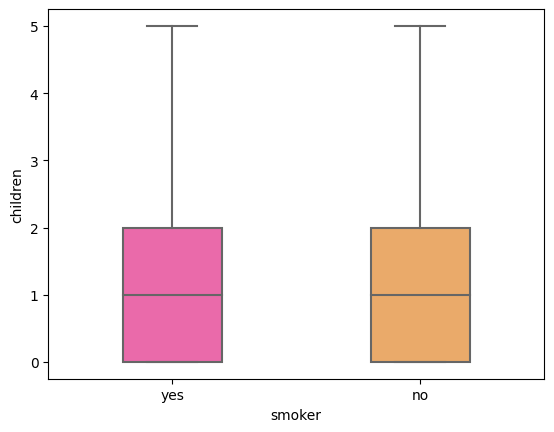

In [ ]:
sns.boxplot(y = 'children', x = 'smoker', data = df, width = 0.4, palette = 'spring' )
plt.show();

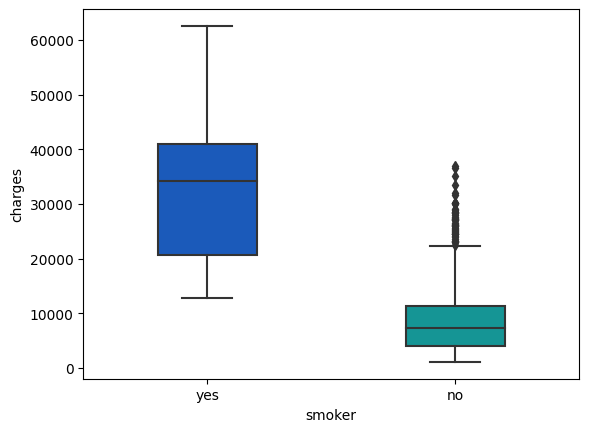

In [ ]:
sns.boxplot(y = 'charges', x = 'smoker', data = df, width = 0.4, palette ='winter')
plt.show();

# Observations:

- Smokers Paid High Charges as compared to Non-Smokers.
- Some of Non-Smokers also paid high Charges.
- Nearly, 80% of Non-Smokers Paid Low Charges.

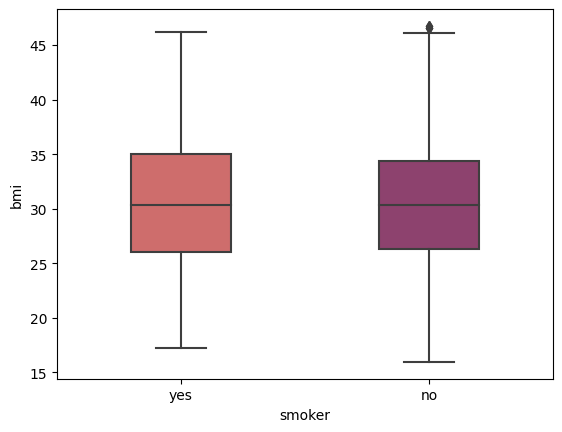

In [ ]:
sns.boxplot(y = 'bmi', x = 'smoker', data = df, width = 0.4, palette = 'flare')
plt.show();

# Observation:

- Non-Smokers have good Body Mass Index as compared to Smokers bmi.

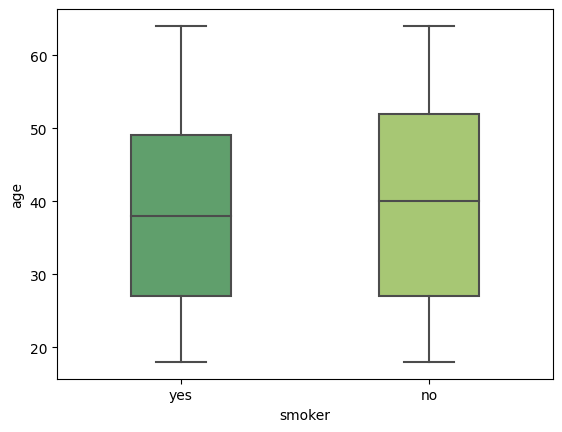

In [ ]:
sns.boxplot(y = 'age', x = 'smoker', data = df, width = 0.4, palette = 'summer')
plt.show();

# Observations:

- 25% to 75% of Smokers age is in between 27 and 49 years.
- 25% to 75% of Non-Smokers age is in between 27 and 51 years.

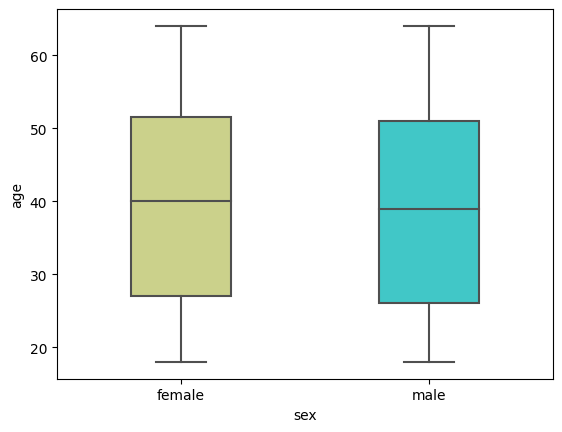

In [ ]:
sns.boxplot(y = 'age', x = 'sex', data = df, width = 0.4, palette = 'rainbow_r')
plt.show();

# Observations:

- Approximately, 25% to 75% of Females age is in between 28 and 51.
- Approximately, 25% to 75% of Males age is in between 27 and 50.

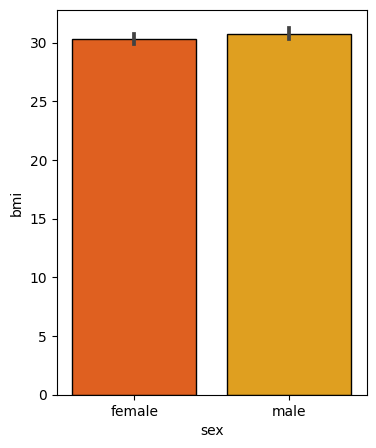

In [ ]:
plt.figure(figsize = (4,5))
sns.barplot(y = 'bmi', x = 'sex', data = df, palette = 'autumn', edgecolor = 'k')
plt.show();

# Observation:

- Somehow, Males have high bmi as compared to Females.

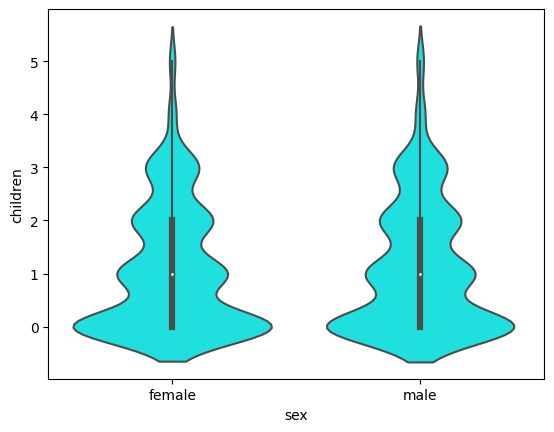

In [ ]:
sns.violinplot(y = 'children', x = 'sex', data = df, color = 'cyan')
plt.show();

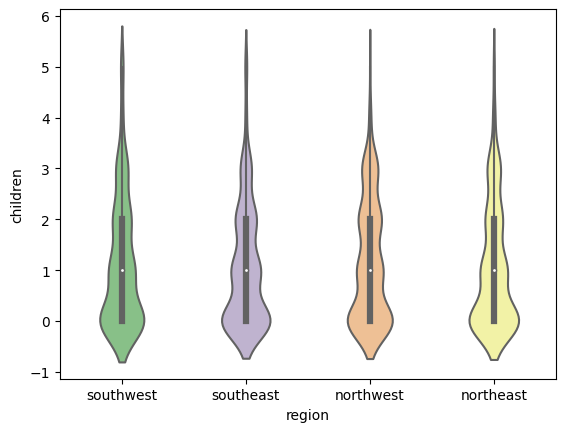

In [ ]:
sns.violinplot(y = 'children', x = 'region', data = df, width = 0.4, palette = 'Accent')
plt.show();

<ipython-input-69-fa79ae3760fa>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(y = 'age', x = 'region', data = df, palette = 'mako')


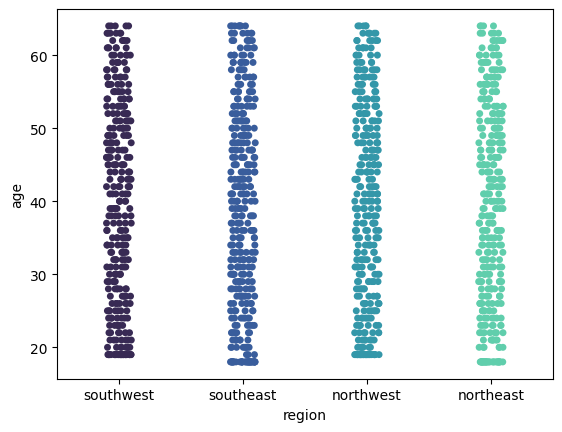

In [ ]:
sns.stripplot(y = 'age', x = 'region', data = df, palette = 'mako')
plt.show();

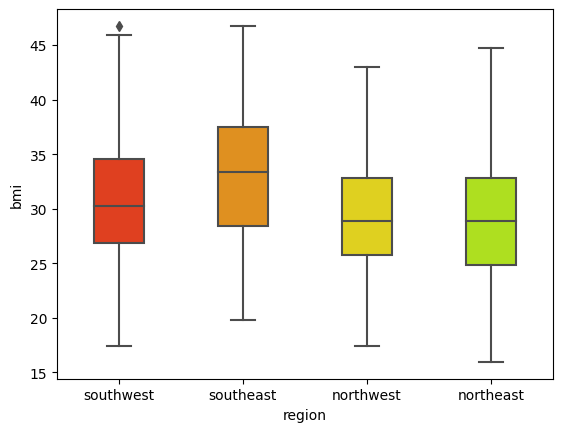

In [ ]:
sns.boxplot(y = 'bmi', x = 'region', data = df, width = 0.4, palette = 'prism')
plt.show;

# Observation:

- More southeast region People having Overweight and Obesity because bmi range is in between nearly 29 and 38 as compared to other regions.

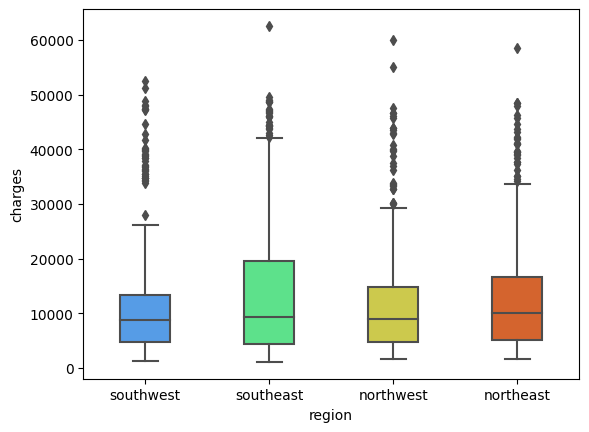

In [ ]:
sns.boxplot(y = 'charges', x = 'region', data = df, width = 0.4, palette = 'turbo')
plt.show();

# Observation:

- southeast region People paid more high charges because of Overweight and Obesity.

<ipython-input-72-4e8cc091af50>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'mako',center = 0, vmin = -1, vmax = 1, annot = True,


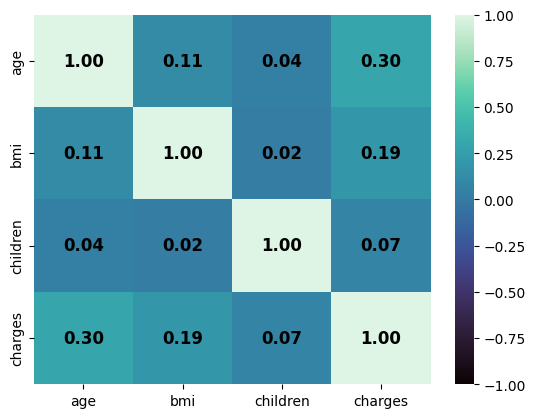

In [ ]:
sns.heatmap(df.corr(), cmap = 'mako',center = 0, vmin = -1, vmax = 1, annot = True,
                                                                    fmt = ".2f", annot_kws = {
                                                                    'fontsize':12,
                                                                    'fontweight':'bold',

                                                                    'color':'k'
                                                                     });

# Observations:

- 30% of Strength exists between age and charges.
- 20% of Strength exists between bmi and charges.
- And other variables impacted very less on charges variable.

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Step-1:Identifying inputvariables (X) and Output Variable (or) Target Variable (y)

In [ ]:
y = df['charges']
X = df[['sex', 'smoker', 'age', 'region', 'children', 'bmi']]

In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
X.head()

,sex,smoker,age,region,children,bmi
0,female,yes,19,southwest,0,27.900
1,male,no,18,southeast,1,33.770
2,male,no,28,southeast,3,33.000
3,male,no,33,northwest,0,22.705
4,male,no,32,northwest,0,28.880


# Step-2:Splitting the data into Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(996, 6) (996,)
(332, 6) (332,)


In [ ]:
X_train.dtypes

sex          object
smoker       object
age           int64
region       object
children      int64
bmi         float64
dtype: object

In [ ]:
X_train_cat = X_train.select_dtypes(include = ['object'])
X_train_cat.head()

,sex,smoker,region
15,male,no,southwest
1139,female,yes,northwest
1049,male,yes,southwest
1015,male,no,northwest
1171,female,yes,southwest


In [ ]:
X_train_num = X_train.select_dtypes(include = ['int64', 'float64'])
X_train_num.head()

,age,children,bmi
15,19,1,24.60
1139,19,0,32.49
1049,49,0,30.90
1015,59,0,25.46
1171,43,2,26.70


# Step-3:Data Preparation of Train Data using Standardization technique for Numerical Variables and Label Encoding technique for Categorical Variables

# Data Preprocessing of Numerical Variables of Train Data using Standardization Technique

In [ ]:
from sklearn.preprocessing import StandardScaler
StandardScaler_object = StandardScaler()

In [ ]:
X_train_num_rescaled = pd.DataFrame(StandardScaler_object.fit_transform(X_train_num), columns = X_train_num.columns, index = X_train_num.index)
X_train_num_rescaled.head()

,age,children,bmi
15,-1.432479,-0.090483,-0.977835
1139,-1.432479,-0.909767,0.332621
1049,0.704546,-0.909767,0.068537
1015,1.416887,-0.909767,-0.834997
1171,0.277141,0.728801,-0.629044


In [ ]:
X_train_num.describe()

,age,children,bmi
count,996.000000,996.000000,996.000000
mean,39.109438,1.110442,30.487354
std,14.045263,1.221191,6.023831
min,18.000000,0.000000,15.960000
25%,26.000000,0.000000,26.125000
50%,40.000000,1.000000,30.230000
75%,51.000000,2.000000,34.600000
max,64.000000,5.000000,46.700000


In [ ]:
print("no:of numerical features:",StandardScaler_object.n_features_in_)
print("Mean of each column:", StandardScaler_object.mean_)
print("Standard deviation of each column:", np.sqrt(StandardScaler_object.var_))

no:of numerical features: 3
Mean of each column: [39.10943775  1.11044177 30.48735442]
Standard deviation of each column: [14.0382106   1.220578    6.02080619]


# Data Preprocessing of Categorical Variables of Train Data using Label Encoding Technique

In [ ]:
X_train_cat['sex'].value_counts(normalize = True)

female    0.502008
male      0.497992
Name: sex, dtype: float64

In [ ]:
X_train_cat['smoker'].value_counts(normalize = True)

no     0.802209
yes    0.197791
Name: smoker, dtype: float64

In [ ]:
X_train_cat['region'].value_counts(normalize = True)

southeast    0.274096
northeast    0.244980
northwest    0.240964
southwest    0.239960
Name: region, dtype: float64

In [ ]:
X_train_cat_le = pd.DataFrame(index = X_train_cat.index)
X_train_cat_le.head()

""
15
1139
1049
1015
1171


In [ ]:
sex_label_encoder = {'female':1, 'male':2}
X_train_cat_le['sex'] = X_train_cat['sex'].apply(lambda x: sex_label_encoder[x])
X_train_cat_le.head()

,sex
15,2
1139,1
1049,2
1015,2
1171,1


In [ ]:
smoker_label_encoder = {'':1, 'male':2}
X_train_cat_le['sex'] = X_train_cat['sex'].apply(lambda x: sex_label_encoder[x])
X_train_cat_le.head()

,sex
15,2
1139,1
1049,2
1015,2
1171,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe_encoder = OneHotEncoder(drop = 'first', sparse = False)

In [ ]:
X_train_cat_ohe = pd.DataFrame(ohe_encoder.fit_transform(X_train_cat), columns = ohe_encoder.get_feature_names_out(X_train_cat.columns), index = X_train_cat.index)
X_train_cat_ohe.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
15,1.0,0.0,0.0,0.0,1.0
1139,0.0,1.0,1.0,0.0,0.0
1049,1.0,1.0,0.0,0.0,1.0
1015,1.0,0.0,1.0,0.0,0.0
1171,0.0,1.0,0.0,0.0,1.0


In [ ]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis = 1)
X_train_transformed.head()

,age,children,bmi,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
15,-1.432479,-0.090483,-0.977835,1.0,0.0,0.0,0.0,1.0
1139,-1.432479,-0.909767,0.332621,0.0,1.0,1.0,0.0,0.0
1049,0.704546,-0.909767,0.068537,1.0,1.0,0.0,0.0,1.0
1015,1.416887,-0.909767,-0.834997,1.0,0.0,1.0,0.0,0.0
1171,0.277141,0.728801,-0.629044,0.0,1.0,0.0,0.0,1.0


In [ ]:
from sklearn.linear_model import LinearRegression
LR_object = LinearRegression()
LR_object.fit(X_train_transformed, y_train)


LinearRegression()

In [ ]:
X_test.head()

,sex,smoker,age,region,children,bmi
1295,male,no,20,southwest,1,22.00
448,female,no,40,southwest,0,29.60
461,male,yes,42,southwest,0,30.00
252,male,yes,54,southeast,2,34.21
1259,female,no,52,northeast,0,23.18


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1295 to 132
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       332 non-null    object 
 1   smoker    332 non-null    object 
 2   age       332 non-null    int64  
 3   region    332 non-null    object 
 4   children  332 non-null    int64  
 5   bmi       332 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 18.2+ KB


In [ ]:
X_test_cat = X_test.select_dtypes(include = 'object')
X_test_cat.head()

,sex,smoker,region
1295,male,no,southwest
448,female,no,southwest
461,male,yes,southwest
252,male,yes,southeast
1259,female,no,northeast


In [ ]:
X_test_num =X_test.select_dtypes(include = ['float64', 'int64'])
X_test_num.head()

,age,children,bmi
1295,20,1,22.00
448,40,0,29.60
461,42,0,30.00
252,54,2,34.21
1259,52,0,23.18


In [ ]:
X_test_num_rescaled = pd.DataFrame(StandardScaler_object.transform(X_test_num), columns = X_test_num.columns, index = X_test_num.index)
X_test_num_rescaled.head()

,age,children,bmi
1295,-1.361245,-0.090483,-1.409671
448,0.063438,-0.909767,-0.147381
461,0.205907,-0.909767,-0.080945
252,1.060717,0.728801,0.618297
1259,0.918248,-0.909767,-1.213684


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe_encoder = OneHotEncoder(drop = 'first',sparse = False)

In [ ]:
X_test_cat_ohe = pd.DataFrame(ohe_encoder.transform(X_test_cat), columns = ohe_encoder.get_feature_names_out(X_test_cat.columns), index = X_test_cat.index)
X_test_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1295,1.0,0.0,0.0,0.0,1.0
448,0.0,0.0,0.0,0.0,1.0
461,1.0,1.0,0.0,0.0,1.0
252,1.0,1.0,0.0,1.0,0.0
1259,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis = 1)
X_test_transformed.head()

,age,children,bmi,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1295,-1.361245,-0.090483,-1.409671,1.0,0.0,0.0,0.0,1.0
448,0.063438,-0.909767,-0.147381,0.0,0.0,0.0,0.0,1.0
461,0.205907,-0.909767,-0.080945,1.0,1.0,0.0,0.0,1.0
252,1.060717,0.728801,0.618297,1.0,1.0,0.0,1.0,0.0
1259,0.918248,-0.909767,-1.213684,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test_transformed.shape

(332, 8)

In [ ]:
X_train_transformed.shape

(996, 8)

In [ ]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis = 1)
X_test_transformed.head()


,age,children,bmi,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1295,-1.361245,-0.090483,-1.409671,1.0,0.0,0.0,0.0,1.0
448,0.063438,-0.909767,-0.147381,0.0,0.0,0.0,0.0,1.0
461,0.205907,-0.909767,-0.080945,1.0,1.0,0.0,0.0,1.0
252,1.060717,0.728801,0.618297,1.0,1.0,0.0,1.0,0.0
1259,0.918248,-0.909767,-1.213684,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_test_pred = LR_object.predict(X_test_transformed)
tem_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_test_pred})
tem_df.head()

,Actual Values,Predicted Values
1295,1964.7800,180.402519
448,5910.9440,7209.397445
461,22144.0320,31734.042942
252,44260.7499,37326.059968
1259,10197.7722,9378.564970


<Axes: xlabel='charges', ylabel='Count'>

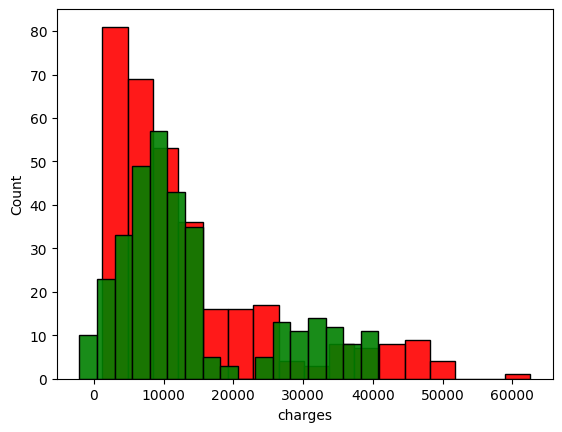

In [ ]:
sns.histplot(y_test, color = 'red', alpha = 0.9)
sns.histplot(y_test_pred, color = 'green', alpha = 0.9)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 4412.364202908731
Mean Squared Error: 40699998.14847282
Root Mean Squared Error: 6379.655017982776


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN_object = KNeighborsRegressor()
KNN_object.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [ ]:
y_test_prediction = KNN_object.predict(X_test_transformed)
temp_df =pd.DataFrame({'Actual Values': y_test, 'Predicted Values':y_test_prediction})
temp_df.head()


,Actual Values,Predicted Values
1295,1964.7800,1890.898200
448,5910.9440,4753.804800
461,22144.0320,24771.376822
252,44260.7499,37101.052240
1259,10197.7722,12047.594720


<Axes: xlabel='charges', ylabel='Count'>

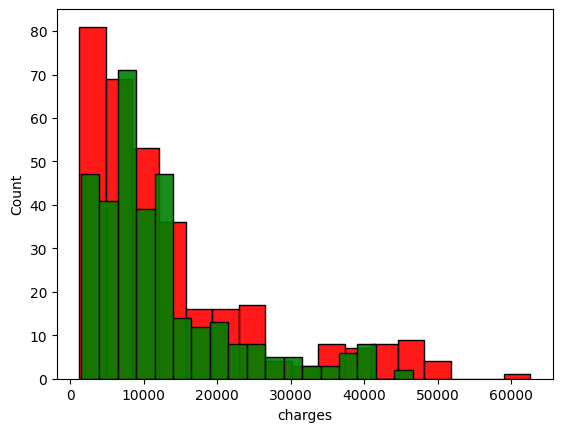

In [ ]:
sns.histplot(y_test, color = 'red', alpha = 0.9)
sns.histplot(y_test_prediction, color = 'green', alpha = 0.9)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_test_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_prediction))
print('Root Mean Squared Error:', np.sqrt(y_test, y_test_prediction))

Mean Absolute Error: 3841.867197709639
Mean Squared Error: 44023491.83154307
Root Mean Squared Error: 1295     44.325839
448      76.882664
461     148.808709
252     210.382390
1259    100.984020
           ...    
1327     96.839582
1284    217.724321
584      35.253596
1022    205.453494
132     105.657787
Name: charges, Length: 332, dtype: float64


In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT_object = DecisionTreeRegressor()
DT_object.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [ ]:
y_test_prediction = DT_object.predict(X_test_transformed)

In [ ]:
temp_df = pd.DataFrame({'Actual values':y_test, 'predicted values':y_test_prediction})
temp_df.head()

,Actual values,predicted values
1295,1964.7800,1980.07000
448,5910.9440,5920.10410
461,22144.0320,37270.15120
252,44260.7499,43254.41795
1259,10197.7722,9991.03765


<Axes: xlabel='charges', ylabel='Count'>

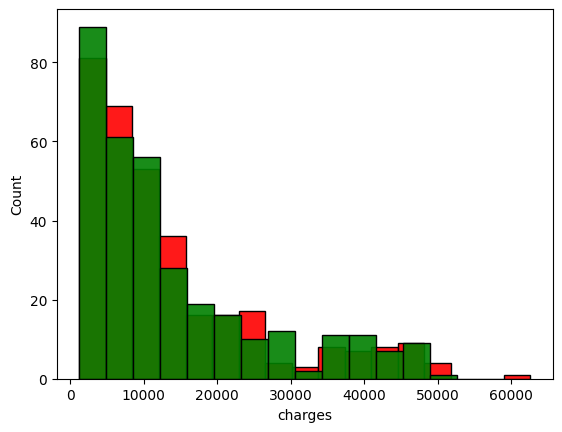

In [ ]:
sns.histplot(y_test, color = 'red', alpha = 0.9)
sns.histplot(y_test_prediction, color = 'green', alpha = 0.9)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_prediction)))

Mean Absolute Error: 3040.639413765061
Mean Squared Error: 41642806.23008332
Root Mean Squared Error: 6453.123757536602


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_object = RandomForestRegressor()
RF_object.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [ ]:
y_test_prediction = RF_object.predict(X_test_transformed)

In [ ]:
temp_df = pd.DataFrame({'Actual values':y_test, 'predicted values':y_test_prediction})
temp_df.head()

,Actual values,predicted values
1295,1964.7800,2374.454969
448,5910.9440,6267.710132
461,22144.0320,37479.242206
252,44260.7499,44470.113328
1259,10197.7722,13022.754079


<Axes: xlabel='charges', ylabel='Count'>

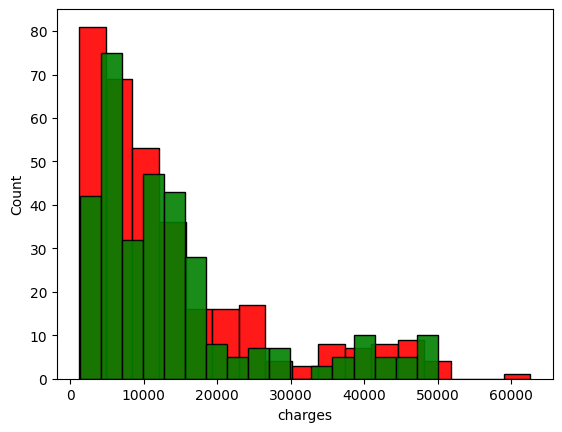

In [ ]:
sns.histplot(y_test, color = 'red', alpha = 0.9)
sns.histplot(y_test_prediction, color = 'green', alpha = 0.9)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_prediction)))

Mean Absolute Error: 2796.2485613329827
Mean Squared Error: 25472864.368972108
Root Mean Squared Error: 5047.064926169675
